# Parte 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create an irregular random 2D signal
x = np.zeros((9, 9))
x[2:7, 2:7] = [[1.0, 0.9, 0.7, 0.9, 1.0],
               [0.8, 0.6, 1.0, 0.6, 0.2],
               [0.7, 1.0, 1.0, 0.8, 0.1],
               [1.0, 0.3, 0.8, 1.0, 0.9],
               [0.9, 0.9, 0.7, 0.9, 1.0]]
print(x)

[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.8 0.6 1.  0.6 0.2 0.  0. ]
 [0.  0.  0.7 1.  1.  0.8 0.1 0.  0. ]
 [0.  0.  1.  0.3 0.8 1.  0.9 0.  0. ]
 [0.  0.  0.9 0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


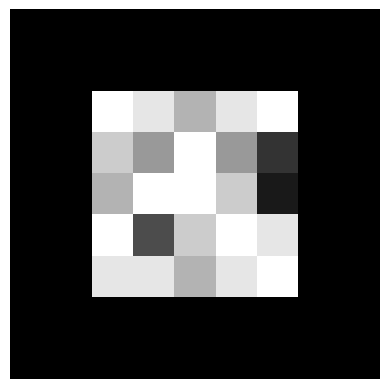

In [5]:
# Plot it
plt.imshow(x, cmap='gray')
plt.axis('off')
plt.show()

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]


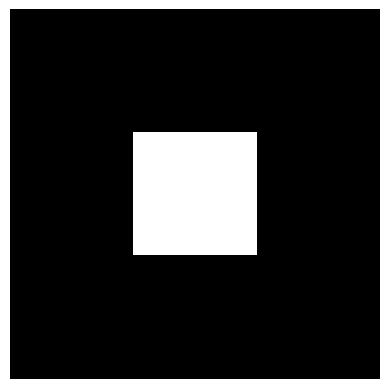

In [6]:
# == Q1 ==
# Crea una señal impulso (delta) en 2D, usando un kernel de tamaño [3x3].
# Reporta la instrucción usada y la salida obtenida.
k = np.array([[0., 0., 0.],
              [0., 1., 0.],
              [0., 0., 0.]])
print(k)

# Se quiere crear un kernel impulso 2D, la posicion del impulso estará en el centro de la matriz
n = 3 # tamaño de la matriz nxn
K = np.zeros((n,n)) # matrix nxn
K[n//2,n//2] = 1. # Se ubica el impulso en el centro de la matriz
print()
print(K)
plt.imshow(K, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# == Q2 ==
# Comprueba que la convolución con la señal impulso (delta) equivale al
# producto unitario, es decir, x = x*k, donde 'k' es un kernel con la
# función delta, y '*' indica la operación de convolución.

# Esta comprobación puedes hacerla de manera práctica usando la función
# convolve en scipy.ndimage. Reporta la combinación de parámetros
# que haya asegurado la equivalencia del producto unitario.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html
# También reporta la salida obtenida.

[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.8 0.6 1.  0.6 0.2 0.  0. ]
 [0.  0.  0.7 1.  1.  0.8 0.1 0.  0. ]
 [0.  0.  1.  0.3 0.8 1.  0.9 0.  0. ]
 [0.  0.  0.9 0.9 0.7 0.9 1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


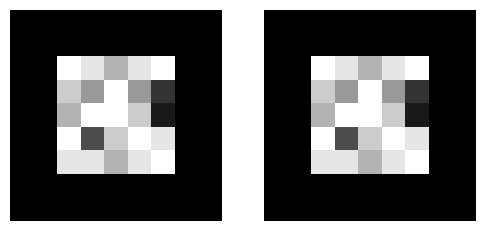

Rate of pixels with same value in x and y: 100.0%


In [7]:
# Import the convolution function and convolve x and h
from scipy.ndimage import convolve
y = convolve(x, k, mode='constant', cval=0.0) # Se hace la convolucion x*k
y1 = convolve(x, k, mode='constant', cval=2)

#   mode: define como se hace el padding, las opciones son:
#    constant: se define un cval (en este caso se usó 1) que es la constante con la que se rellena el padding
#    reflect: el padding son los valores reflejados de la imagen
#    nearest: el elemento mas cercano al borde es que el que se usa para hacer el padding
#    mirror: el padding son los valores como si estos fueran reflejados en un espejo
#    wrap: se usan los valores de la imagen para hacer el padding

print(y)

# Plot it
plt.figure(figsize=(6,20))
plt.subplot(1,2,1)
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(y1, cmap='gray')
plt.axis('off')
plt.show()

# Se ve como la imagen es exactamente la misma para ambos valores de cval ya que la convolucion con
# el delta de dirac genera siempre la respuesta original. Mirandolo con los numeros, la parte externa
# del filtro delta de dirac es cero, por lo tanto no importa que numero tenga el padding siempre el resultado de
# la multiplicacion es cero.

# Comprobación AQUÍ
print(f"Rate of pixels with same value in x and y: {100*(x == y).sum() / (x.shape[0] * x.shape[1])}%")

In [ ]:
# Revisa la documentación de convolve y verifíca qué pasa si modificamos los
# valores de sus parámetros.

# Concretamente:
# == Q3 == ¿Qué impacto tiene modificar mode? -- Muestra un ejemplo.
# -- Tipo de padding: {reflect} (`d c b a | a b c d | d c b a`)
#                     constant  (`k k k k | a b c d | k k k k`)
#                     nearest   (`a a a a | a b c d | d d d d`)
#                     mirror    (`d c b | a b c d | c b a`)
#                     wrap      (`a b c d | a b c d | a b c d`)

# == Q4 == ¿Qué impacto tiene modificar cval? -- Muestra un ejemplo.
# -- Valor de llenado del padding constant
# == Q5 == ¿Qué impacto tiene modificar origin? -- Muestra un ejemplo.
# -- Pixel ancla para la correspondencia de la convolución

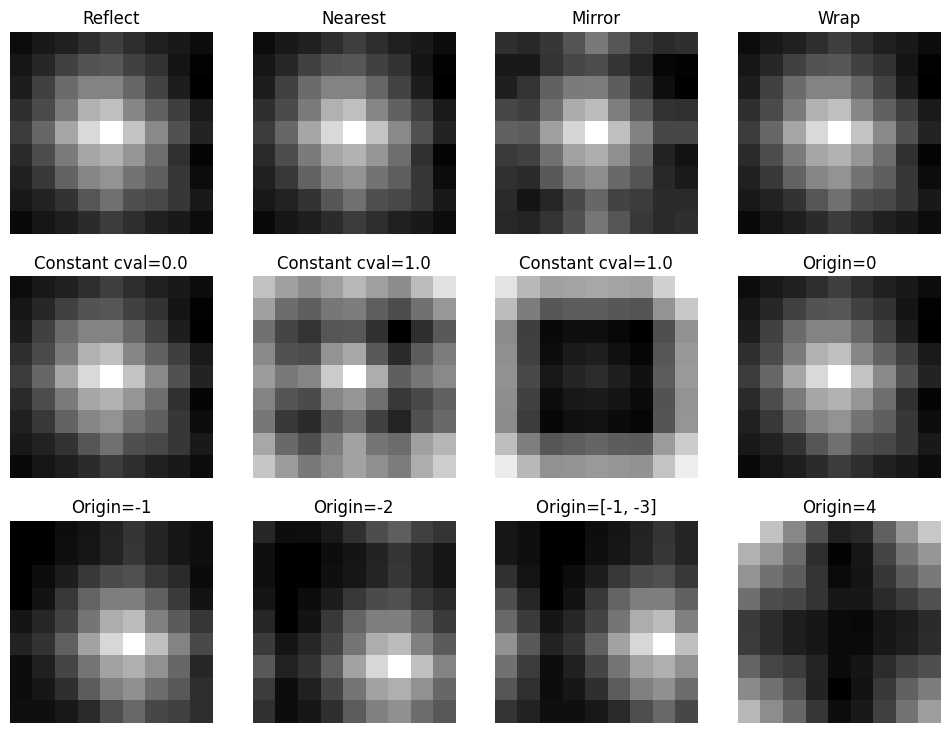

In [ ]:
plt.figure(figsize=(12, 9))

plt.subplot(3, 4, 1)
plt.title('Reflect')
y = convolve(x, x, mode='reflect')
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.title('Nearest')
y = convolve(x, x, mode='nearest')
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.title('Mirror')
y = convolve(x, x, mode='mirror')
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.title('Wrap')
y = convolve(x, x, mode='wrap')
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.title('Constant cval=0.0')
y = convolve(x, x, mode='constant', cval=0.0)
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.title('Constant cval=1.0')
y = convolve(x, x, mode='constant', cval=1.0)
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.title('Constant cval=1.0')
y = convolve(x, x, mode='constant', cval=5.0)
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.title('Origin=0')
y = convolve(x, x, origin=0)
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 9)
plt.title('Origin=-1')
y = convolve(x, x, origin=-1)
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.title('Origin=-2')
y = convolve(x, x, origin=-2)
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 11)
plt.title('Origin=[-1, -3]')
y = convolve(x, x, origin=[-1, -3])
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.subplot(3, 4, 12)
plt.title('Origin=4')
y = convolve(x, x, origin=4)
plt.imshow(y, cmap='gray')
plt.axis('off')

plt.show()



# A3: El modo modifica los valores al rededor de la imagen, estos cambios se pueden notar en los bordes de las primeras 4 figuras. Los bordes cambian y como
#     el padding no es constante se ve como algunas partes del borde son mas claras o mas oscuras dependiendo del modo
# A4: El impacto de modificar cval se ve en las figuras del centro, a medida que se aumenta el cval los bordes se hacen mas claros ya que al ser los valores del
#     padding mas alto, el resultado de la convolucion es un numero mayor.
# A5: Cambiar origin modifica el centro de la señal a la cual se le aplica el filtro, experimentalmente se observa que cuando se le indica a origin un solo numero
#     mueve en ambas direcciones el origen de la imagen.
#     En la pagina de scipy dice que para valores positivos mueve el filtro para la derecha y negativos para la
#     izquierda, dado esto tiene sentido los resultados. Por ejemplo, en la ultima figura el filtro de la posicion 0,0 se mueve a la 4,4 es decir, 4 a la derecha y 4
#     abajo, lo cual hace que el filtro inicie desde el centro de la figura y como se puede ver, el punto blanco que originalmente estaba en el centro ahora esta en
#     la izquina superior izquierda debido a que el filtro inicio desde allí


# Parte 2

In [9]:
# Load image and print some info
from skimage import data
from skimage import color
IMG = color.rgb2gray(data.astronaut()) # Loads image in gray-scale mode

print(f"Astronaut image of size [{IMG.shape[0]}x{IMG.shape[1]}] pixels.")
print(f"Min and max pixel values = [{IMG.min()}, {IMG.max()}]")

Astronaut image of size [512x512] pixels.
Min and max pixel values = [0.0, 1.0]


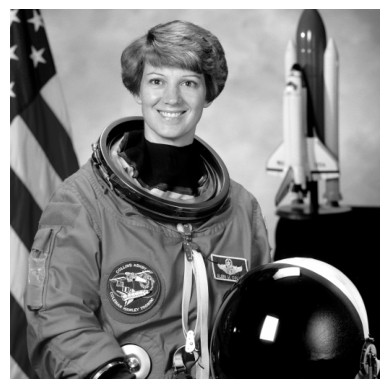

Average intensity: 0.44+-0.30


In [14]:
# Plot it
plt.imshow(IMG, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {IMG.mean():4.2f}+-{IMG.std():4.2f}")

Convolved-Astronaut image of size [512x512] pixels.
Min and max pixel values = [0.0, 0.9969862745098041]


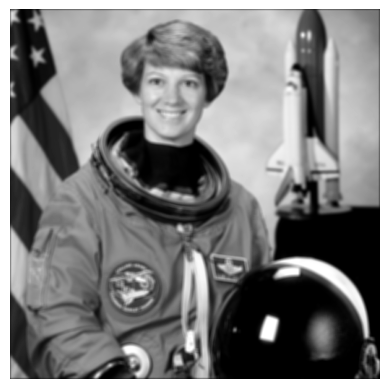

In [17]:
# == Q6 ==
# Define an average kernel of size [5x5] and convolve the image with it.
# Reporta el kernel que hayas usado.
# Make sure the intensity values of the resulting image are within the interval
# [0.0, 1.0]
AVk = 1/25 * np.ones(shape=(5, 5)) # Kerner 5x5 con distribucion promedio uniforme
AVy = convolve(IMG, AVk, mode='constant', cval=0.0) # Convolucion entre la imagen y el kernel

print(f"Convolved-Astronaut image of size [{AVy.shape[0]}x{AVy.shape[1]}] pixels.")
print(f"Min and max pixel values = [{AVy.min()}, {AVy.max()}]") # Se verifica que los valores si estan entre 0 y 1

plt.imshow(AVy, cmap='gray')
plt.axis('off')
plt.show()
# El resultado es que el kernel promedio lo que hace es difuminar la imagen

In [18]:
# == Q7 ==
# La función scipy.ndimage.convolve es una función propia para imágenes, a
# diferencia de scipy.signal.convolve2d, la cual es una función genérica para
# señales 2D. Revisa la documentación de ambas y compara sus salidas.
# ¿Cuáles son sus diferencias?


# La diferencia principal radica en que la función "convolve" es capaz de realizar convoluciones
# en múltiples dimensiones, es decir, puede funcionar en matrices con más de dos dimensiones.
# Por otro lado, la función "convolve2d" está diseñada específicamente para realizar convoluciones
# en matrices de dos dimensiones, es decir, se utiliza para procesar imágenes o matrices bidimensionales.

# -- Realizan la misma función, con nombres de argumentos diferentes.
# full, valid, same para el tamaño de la salida, fill, wrap, symm, para padding

from scipy.signal import convolve2d

In [21]:
# == Q8 ==
# Imprime el valor de AVk usado anteriormente y explica por qué es constante
# para todos sus elementos y por qué se usa justamente ese valor.
print(AVk)

# se crea dividiendo el número máximo posible entre la cantidad de elementos en la matriz.
# En este caso, al ser una matriz de 5x5, se genera inicialmente una matriz compuesta por
# unos y luego se divide cada elemento por 25, que es el resultado de multiplicar 5 por 5.

# -- Es una media aritmética, por lo tanto todos los pesos de la combinación
# lineal deben ser los mismos, el recíproco (inverso) del número de pesos.

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


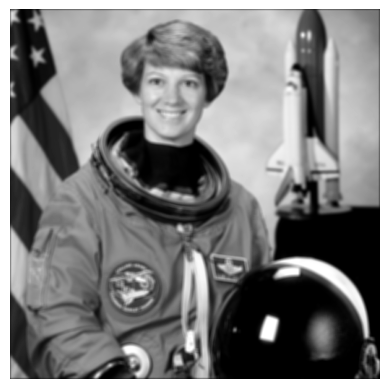

Average intensity: 0.44+-0.29


In [20]:
# Plot convolved image
plt.imshow(AVy, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {AVy.mean():4.2f}+-{AVy.std():4.2f}")

In [22]:
# == Q9 ===
# Encuentra la forma de aplicar la convolución repetidamente sobre la imagen
# hasta que la variación promedio entre las intensidades de los pixeles sea
# menor o igual a 0.15.
# Reporta el pseudocódigo (o código) usado para este procedimiento. También
# reporta cuántas convoluciones repetidas requeriste.
num_inter = 5000
std_dev = np.zeros((num_inter, 1))

AVy = convolve(IMG, AVk, mode='constant', cval=0.0)
std_dev[0] = AVy.std()
for ind in range(1, num_inter):
  AVy = convolve(AVy, AVk, mode='constant', cval=0.0)
  std_dev[ind] = AVy.std()
  if std_dev[ind] <= 0.15:
    break

print('Convoluciones',ind, std_dev[ind])

Convoluciones 3771 [0.14999325]


In [23]:
count = [] # Cuentas las iteraciones necesarias para llegar a la desviacion estandar requerida
AVy2 = IMG
desv =  AVy2.std() # Almacena la desviacion estandar
while desv > 0.15: # Sigue iterando mientras que no consigamos el objetivo de reducir la desviacion de los datos en la imagen
  AVy2 = convolve(AVy2, AVk, mode='constant', cval=0)
  desv = AVy2.std()
  count.append(desv)
   # Se ve como ambos dan el mismo resultado, solo que este print muesta la cantidad de elementos que tiene count mientras que en
   # el codigo pasado lo que se imprime es el indice del ultimo dato (que es menor en uno a la longitud del arreglo)
print(len(count), AVy2.std())

3772 0.14999325324209647


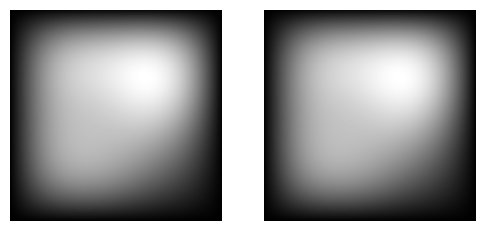

Average intensity: 0.24+-0.15


In [24]:
# Plot convolved image
plt.figure(figsize=(6,15))
plt.subplot(1,2,1)
plt.imshow(AVy, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(AVy2, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {AVy.mean():4.2f}+-{AVy.std():4.2f}")

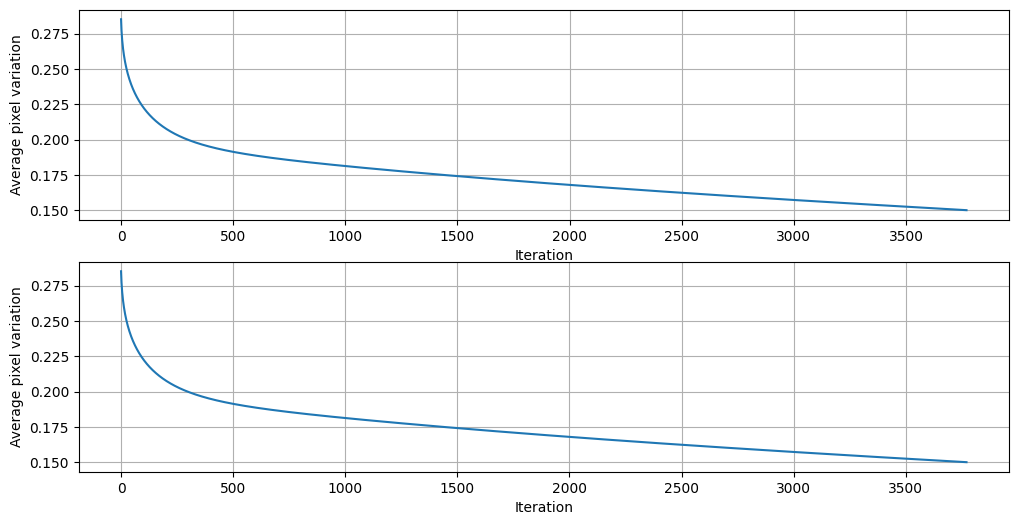

In [27]:
# == Q10 ==
# Grafica la variación promedio histórica de las intensidades de los pixeles
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(std_dev[:ind])
plt.xlabel('Iteration')
plt.ylabel('Average pixel variation')
plt.grid()
plt.subplot(2,1,2)
plt.plot(count)
plt.xlabel('Iteration')
plt.ylabel('Average pixel variation')
plt.grid()
plt.show()

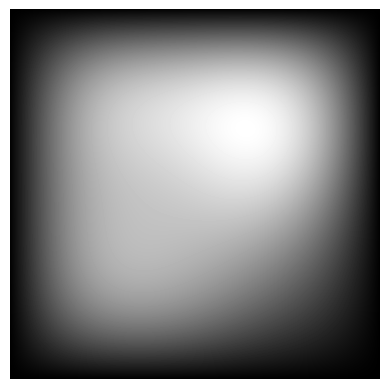

Average intensity: 0.24+-0.15
Min and max pixel values = [3.187726056213797e-05, 0.522220796260569]


In [28]:
# Plot final convolved image
plt.imshow(AVy, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {AVy.mean():4.2f}+-{AVy.std():4.2f}")
print(f"Min and max pixel values = [{AVy.min()}, {AVy.max()}]")

In [ ]:
# == Q11 ==
# ¿Qué relación encuentras entre los resultados de las convoluciones repetidas y
# el Teorema del Límite Central (tendrás que investigar qué dice el teorema si no
# lo conoces -- No worries, es muy sencillo e intuitivo).


# A11:
# El resultado final muestra una similitud con el teorema del límite central.
# Al aplicar repetidamente la convolución de un filtro a una imagen, se observa
# que las intensidades de gris tienden a seguir una distribución gaussiana.


# -- From Wikipedia:
# ... in some situations, when independent random variables are added, their
# properly normalized sum tends toward a normal distribution (informally a bell
# curve) even if the original variables themselves are not normally ...
# ... it implies that probabilistic and statistical methods that work for normal
# distributions can be applicable to many problems involving other types of
# distributions.

# Parte 3

(7, 1)
Column Kernel:
 [[0.00443305]
 [0.05400558]
 [0.24203623]
 [0.39905028]
 [0.24203623]
 [0.05400558]
 [0.00443305]]
(7, 7)


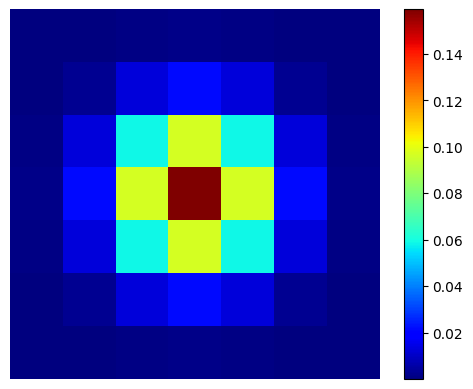

In [29]:
# Create a 2D Gaussian filter
import cv2
kernel = cv2.getGaussianKernel(7, 1)
print(kernel.shape)
print(f"Column Kernel:\n {kernel}")

GSSk = np.outer(kernel, kernel.transpose())
print(GSSk.shape)
#print(f"Matrix kernel:\n {GSSk}")

plt.imshow(GSSk, cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

In [ ]:
# == Q12 ==
# ¿Qué hace la función np.outer?

# Se utiliza para calcular el producto exterior de dos arrays.
# Dado un par de vectores de entrada, la función np.outer
# devuelve una matriz que representa el producto exterior de los vectores.

# El producto exterior se calcula tomando cada elemento del primer vector y multiplicándolo
#  por cada elemento del segundo vector, y luego organizando los resultados en una matriz

# A12: Multiplica dos vectores y nos da como resultado una matriz
# -- Producto matricial de vectores.

In [32]:
# Now create a Gaussian kernel of size [3x3], and convolve it with the image
kernel = cv2.getGaussianKernel(3, 2.0)
GSSk = np.outer(kernel, kernel.transpose())
GSSy = convolve(IMG, GSSk, mode='constant')

print(f"Convolved-Astronaut image of size [{GSSy.shape[0]}x{GSSy.shape[1]}] pixels.")
print(f"Min and max pixel values = [{GSSy.min()}, {GSSy.max()}]")
GSSk.shape

Convolved-Astronaut image of size [512x512] pixels.
Min and max pixel values = [0.0, 0.9985060677155607]


(3, 3)

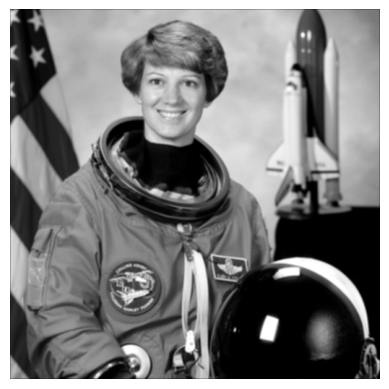

Average intensity: 0.44+-0.29


In [33]:
# Plot convolved image
plt.imshow(GSSy, cmap='gray')
plt.axis('off')
plt.show()
print(f"Average intensity: {GSSy.mean():4.2f}+-{GSSy.std():4.2f}")

In [35]:
# == Q12 ==
# Explica qué hace la siguiente función

def salt_and_pepper(IMG):
    img = IMG.copy()
    n_rows, n_cols = img.shape
    for row in range(n_rows):
        for col in range(n_cols):
            thresh = np.random.rand()
            if thresh > 0.95:
                img[row, col] = 1
            elif thresh < 0.05:
                img[row, col] = 0
    return img

# añade de forma aleatoria puntos blancos y negros (ruido sal y pimienta) en una imagen
# cambiando los valores de píxeles seleccionados en la matriz de la imagen por 1 (blanco) o 0 (negro),
# respectivamente. Esto crea un efecto visual similar al ruido sal y pimienta presente en algunas imágenes digitales.

# Añade ruido con probabilidad aleatoria deseada
def salt_and_pepper_mod(IMG, n):
    img = IMG.copy()
    n_rows, n_cols = img.shape
    for row in range(n_rows):
        for col in range(n_cols):
            thresh = np.random.rand()
            if thresh > (1 - n/200):
                img[row, col] = 1
            elif thresh < (n/200):
                img[row, col] = 0
    return img

# -- Agrega ruido con probabilidad aleatoria del 10%
# ruido sal y pimienta

# La función salt_and_pepper_mod es una modificación de la función salt_and_pepper
# anteriormente explicada. La principal diferencia es que se agrega un parámetro
# adicional n, que representa la intensidad del ruido sal y pimienta deseado.

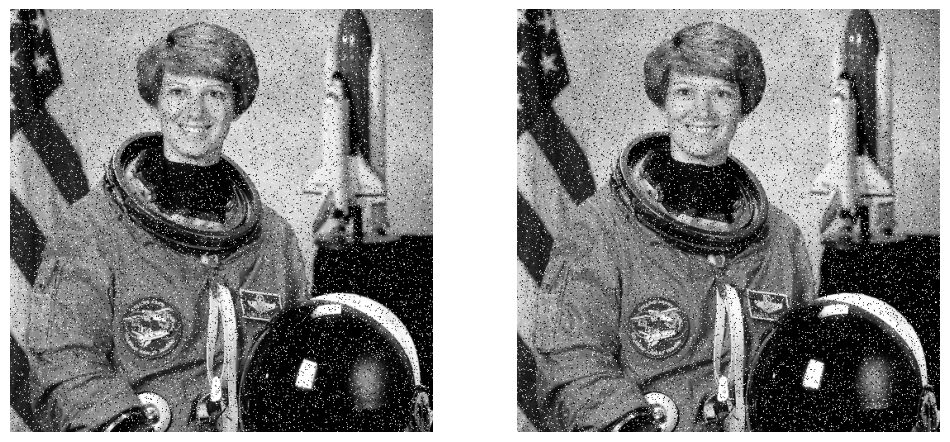

Average intensity: 0.45+-0.32
Min and max pixel values = [0.0, 1.0]
There is 4.96% of pixels average variation.
Average intensity: 0.45+-0.32
Min and max pixel values = [0.0, 1.0]
There is 5.07% of pixels average variation.


In [36]:
# Create a varying copy of the image
nIMG = salt_and_pepper(IMG) # La imagen se pasa atraves de la funcion que le agrega ruido
nIMG_mod = salt_and_pepper_mod(IMG, 10)
plt.figure(figsize=(12,24))
plt.subplot(1,2,1)
plt.imshow(nIMG, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(nIMG_mod, cmap='gray')
plt.axis('off')
plt.show()

print(f"Average intensity: {nIMG.mean():4.2f}+-{nIMG.std():4.2f}")
print(f"Min and max pixel values = [{nIMG.min()}, {nIMG.max()}]")
print(f"There is {100 * np.abs((IMG - nIMG)).sum() / (IMG.shape[0] * IMG.shape[1]):4.2f}% of pixels average variation.")
print(f"Average intensity: {nIMG_mod.mean():4.2f}+-{nIMG_mod.std():4.2f}")
print(f"Min and max pixel values = [{nIMG_mod.min()}, {nIMG_mod.max()}]")
print(f"There is {100 * np.abs((IMG - nIMG_mod)).sum() / (IMG.shape[0] * IMG.shape[1]):4.2f}% of pixels average variation.")

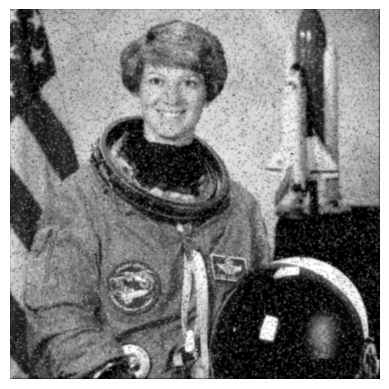

There is 8.55% of pixels average variation.


In [ ]:
# Create a Gaussian kernel and apply it on the modified image (nIMG)
kernel = cv2.getGaussianKernel(6, 1.0)
Gk = np.outer(kernel, kernel.transpose())
Go = convolve(nIMG, Gk, mode='constant')

# Plot convolved image
plt.imshow(Go, cmap='gray')
plt.axis('off')
plt.show()
print(f"There is {100 * np.abs((Go - nIMG)).sum() / (Go.shape[0] * Go.shape[1]):4.2f}% of pixels average variation.")

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
[[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]
[[0.1069973  0.11310982 0.1069973 ]
 [0.11310982 0.11957153 0.11310982]
 [0.1069973  0.11310982 0.1069973 ]]
[[0.10879655 0.11225012 0.10879655]
 [0.11225012 0.11581332 0.11225012]
 [0.10879655 0.11225012 0.10879655]]


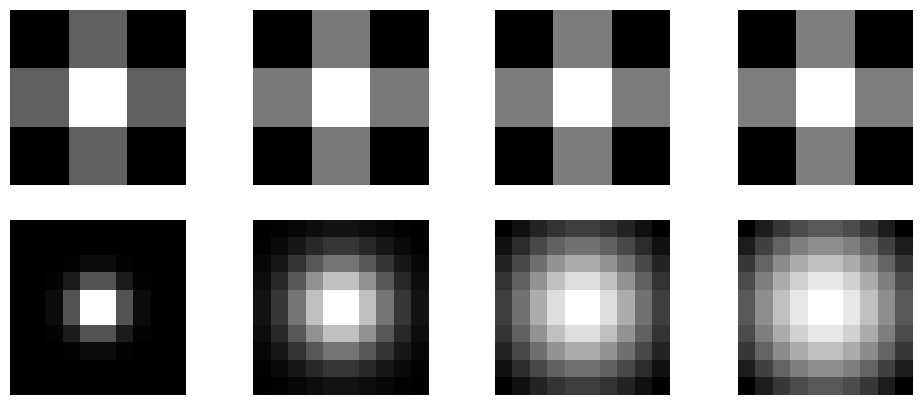

In [38]:
plt.figure(figsize=(12,5))
for i in range(0,4):
  kernel = cv2.getGaussianKernel(3, i+1)
  Gk = np.outer(kernel, kernel.transpose())
  print(Gk)
  plt.subplot(2,4,i+1)
  plt.imshow(Gk, cmap='gray')
  plt.axis('off')
for i in range(0,4):
  kernel = cv2.getGaussianKernel(10, i+1)
  Gk = np.outer(kernel, kernel.transpose())
  plt.subplot(2,4,5+i)
  plt.imshow(Gk, cmap='gray')
  plt.axis('off')
plt.show()

In [39]:
# == Q14 ==
# Acabamos de crear un kernel Gaussiano de 6x6 pixeles con desviación estándar = 1.0.
# Anteriormente habíamos hecho uno de 7x7 pixeles con desviación estándar = 1.
# Investiga cuál es el impacto de la desviación estándar en la creación de una función
# Gaussiana, y su relación con el tamaño del kernel.

# A14: En el código anterior, se observa que la desviación estándar define la dispersión
# de los valores de los píxeles en la imagen. Otra forma de interpretarlo es que
# cuanto más cercana a cero sea la desviación estándar, más similar será al kernel
# de impulso, mientras que cuanto más se acerque a infinito, más similar será al
# kernel de promedio uniforme.

# Además, el tamaño del kernel determina qué parte de la función gaussiana se va a tomar.
# Con un kernel de 3x3, el tamaño es tan pequeño que solo abarca una pequeña porción
# del centro de la función gaussiana. Si se observa la impresión de los valores,
# se puede notar que cambian, pero a simple vista puede no ser fácil de percibir.
#  Por otro lado, con un kernel de 10x10, al tomar un fragmento más grande de la
#  función gaussiana, se puede apreciar mejor cómo varía cuando se modifica el parámetro de sigma (desviación estándar)

# -- num_pixels = 6\sigma + 1
# aproxima una campana de Gauss con 1\sigma por cada pixel

# Parte 4

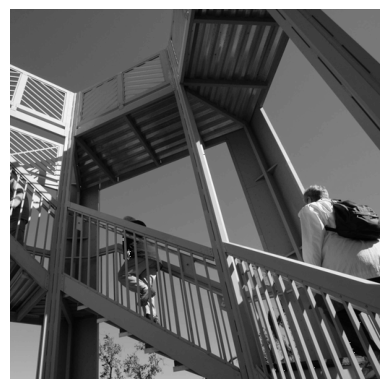

In [41]:
# Border/Edge detection
from scipy import datasets
IMG2 = datasets.ascent()
IMG2 = IMG2 - IMG2.min()
IMG2 = IMG2 / IMG2.max()

# Plot image
plt.imshow(IMG2, cmap='gray')
plt.axis('off')
plt.show()

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


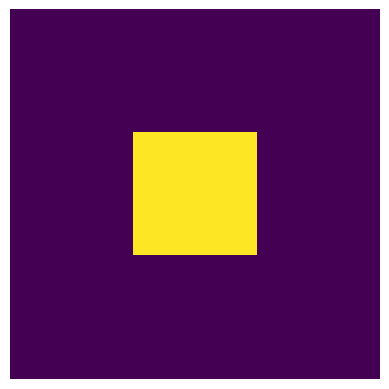

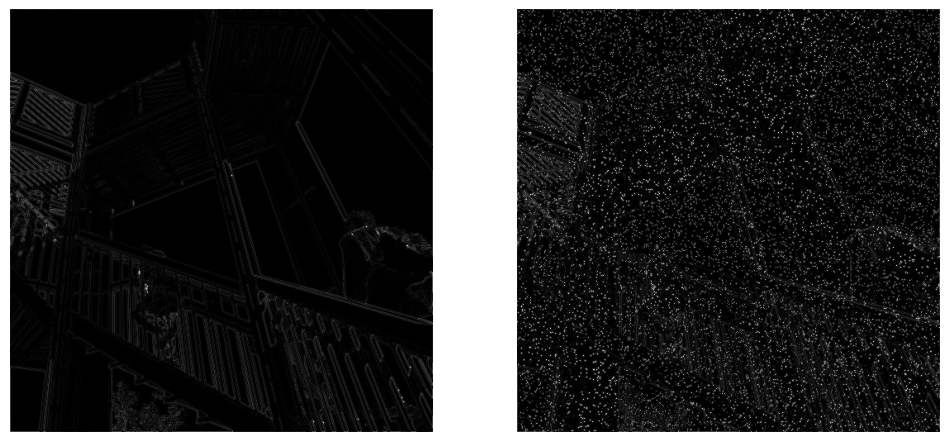

-7.101960784313726
7.32156862745098


In [42]:
# Laplacian line detector
Lapk = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
print(Lapk)
Lapy = convolve(IMG2, Lapk, mode='constant')

plt.imshow(Lapk)
plt.axis('off')

# Plot convolved image
plt.figure(figsize=(12, 24))
plt.subplot(1,2,1)
plt.imshow(np.abs(Lapy), cmap='gray')  # -- Why np.abs(): porque al convolucionar con un kernel con valores negativos puede que el resultado sea negativo pero los
                                       #                  colores estan definidos para numeros positivos.
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(np.abs(convolve(salt_and_pepper_mod(IMG2, 5), Lapk, mode='constant')), cmap='gray') # Se nota que la el filtro laplaciano es muy sencible al ruido
plt.axis('off')
plt.show()

print(Lapy.min())
print(Lapy.max())

In [ ]:
# Resulta que el Laplaciano es muy sensible al ruido, por lo que normalmente
# la imágen es suavizada primero mediante un filtro Gaussiano, y el Laplaciano
# se aplica sobre la imagen ya suavizada

Gaussiana:
 [[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]]
LoG:
 [[ 0.00087903  0.00596818  0.0238592   0.03817177  0.0238592   0.00596818
   0.00087903]
 [ 0.00596818  0.01495502  0.03183681  0.03829248  0.03183681  0.01495502
   0.00596818]
 [ 0.0238592   0.03183681 -0.0150

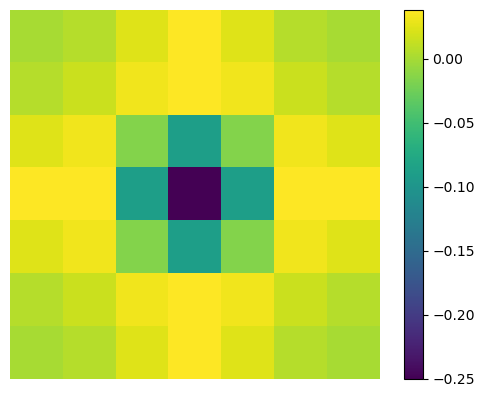

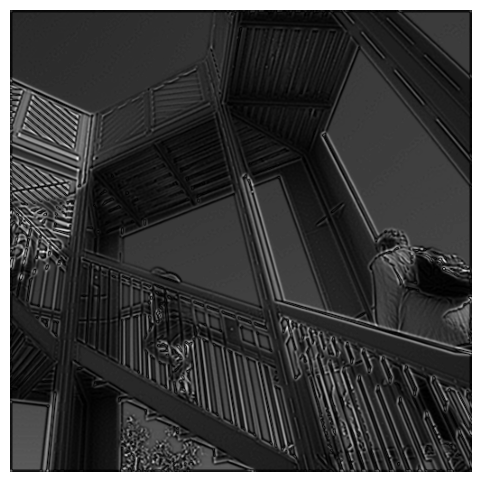

-0.31659987823679986
0.3946863195420411


In [ ]:
# == Q15 ==
# Usando las propiedades de la convolución, crea un kernel "Laplacian of Gaussian (LoG)",
# el cual es el Laplaciano del Gaussiano (puedes googlear su definición matemática).
# Créalo para disminuir el número de convoluciones requeridas, es decir, realiza la
# convolución de un kernel Gaussiano con uno Laplaciano, y el resultado aplícalo a la imagen.
# a) Imprímelo.
# b) Grafícalo.
# c) Aplícalo sobre la imagen de las escaleras.
# d) ¿Notas alguna diferencia respecto a la salida de la celda anterior?

# Notes
# img = cv2.GaussianBlur()
# img = cv2.Laplacian()
# from scipy.ndimage import gaussian_laplace

Gauk = cv2.getGaussianKernel(7, 1.0)
Gauk = np.outer(Gauk, Gauk.transpose())
print("Gaussiana:\n", Gauk)

LoGk = cv2.Laplacian(Gauk, cv2.CV_64F)
print("LoG:\n", LoGk)

plt.imshow(LoGk)
plt.axis('off')
plt.colorbar()
plt.show()

LoGy = convolve(IMG2, LoGk, mode='constant')

plt.figure(figsize=(6, 6))
plt.imshow(np.abs(LoGy), cmap='gray')
plt.axis('off')
plt.show()

print(LoGy.min())
print(LoGy.max())

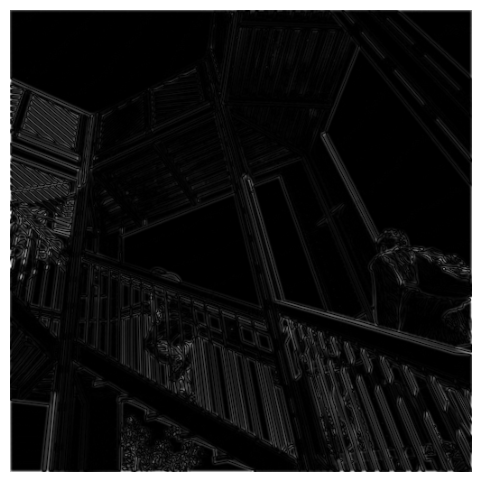

In [ ]:
# Laplacian border detector: Gaussian + Laplacian
# Esta celda aplica primero el filtro Gaussiano y después el Laplaciano,
# nota que la pregunta pude crear un Laplaciano de Gaussiano, lo cual es
# ligeramente distinto a lo que hay en esta celda.
Gauk = cv2.getGaussianKernel(7, 1)
Gauk = np.outer(Gauk, Gauk.transpose())
Gauy = convolve(IMG2, Gauk, mode='constant')

Lapk = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
Lapy = convolve(Gauy, Lapk, mode='constant')

# Plot convolved image
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(Lapy), cmap='gray')
plt.axis('off')
plt.show()